#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Task 1: Basic Data Exploration

### Identify the number of rows and columns
First step is to know the dimensions of the the dataset that we are working with. 
Using `shape` method, we can know the number of rows and columns.

In [14]:
rows, columns = df.shape
print(f'Number of rows: {rows}, and number of columns: {columns}')
      

Number of rows: 148654, and number of columns: 13


### Determine the data types of each column

In [17]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

### Check for missing values in each column


We can check the missing values using different methods:
* info() for a quick high-level overview of the columns' names, non-null and datatype of each column. 
* isnull().sum() for a detailed count of missing values in each column 
* isnull().heatmap() for a visual representation of the distribution of missing values, it's not very effective when there are only a few missing values in a certain column. 

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [18]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

<Axes: >

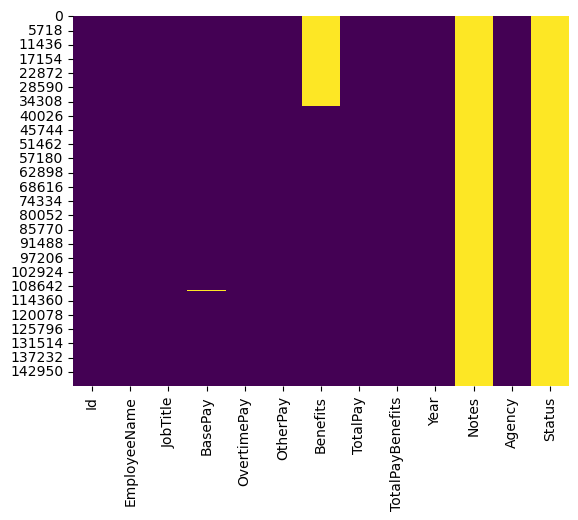

In [19]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Task 2: Descriptive Statistics

### Data stats
`describe` gives a quick overview of the main stats of the complete dataframe or specific column

In [29]:
df_stats= df[['BasePay','TotalPay']].describe()
df_stats

,BasePay,TotalPay
count,148045.000000,148654.000000
mean,66325.448840,74768.321972
std,42764.635495,50517.005274
min,-166.010000,-618.130000
25%,33588.200000,36168.995000
50%,65007.450000,71426.610000
75%,94691.050000,105839.135000
max,319275.010000,567595.430000


### salary range

In [36]:
salary_range = df['TotalPay'].max() - df['TotalPay'].min()
salary_range

568213.56

# Task 3: Data Cleaning

### Handle missing data

Based on the a previous step `Check for missing values in each column`, we found 4 columns that contain missing values; BasePay, OvertimePay, OtherPay, Benefits, Notes, Status.
* `Notes` and `Status` columns are completely empty - has no data at all- we we will need to drop these 2 columns

In [38]:
df.drop(columns=['Notes','Status'], inplace=True)
df.shape

(148654, 11)

* `Benefits` is calculated from subtracting TotalPay from 'TotalPayBenefits', so we can impute the missing values in this column using the following calculation.

In [39]:
df['Benefits'].fillna(df['TotalPayBenefits'] - df['TotalPay'], inplace=True)


In [40]:
df['Benefits'].isnull().sum()

0

* `BasePay` column has 609 missing values, we can using the mean imputation to fill the missing data.

In [41]:
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['BasePay'].isnull().sum()


0

* `OvertimePay` and `OtherPay` have 4 missing data, after examining the data, we found that these missing values are included in rows that don't have informative data, so it can be deleted without affecting the analysis.

In [42]:
df[df['OvertimePay'].isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,66325.44884,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,66325.44884,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,66325.44884,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,66325.44884,NaN,NaN,0.0,0.0,0.0,2014,San Francisco


In [43]:
df[df['EmployeeName']=='Not provided']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,66325.44884,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,66325.44884,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,66325.44884,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,66325.44884,NaN,NaN,0.0,0.0,0.0,2014,San Francisco


In [44]:
df = df[df['EmployeeName'] != 'Not provided']

# Task 4: Basic Data Visualization

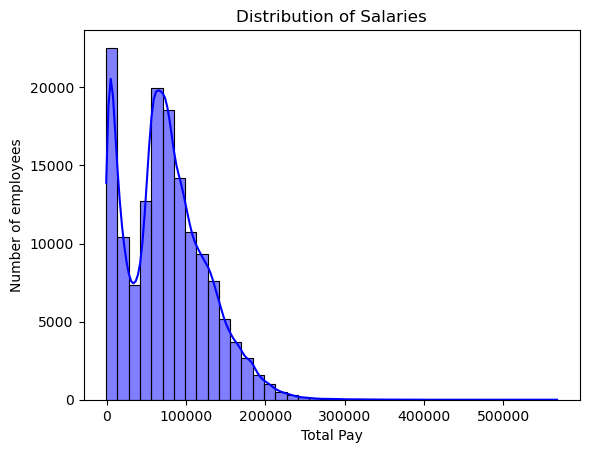

In [45]:
sns.histplot(df['TotalPay'], bins=40, kde=True, color='blue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Number of employees')
plt.show()

In [65]:
top_dep = df['JobTitle'].value_counts(normalize=True).head(10)
top_dep

JobTitle
Transit Operator                0.047333
Special Nurse                   0.029526
Registered Nurse                0.025133
Public Svc Aide-Public Works    0.016939
Police Officer 3                0.016287
Custodian                       0.016266
TRANSIT OPERATOR                0.016065
Firefighter                     0.015869
Recreation Leader               0.013259
Patient Care Assistant          0.013084
Name: proportion, dtype: float64

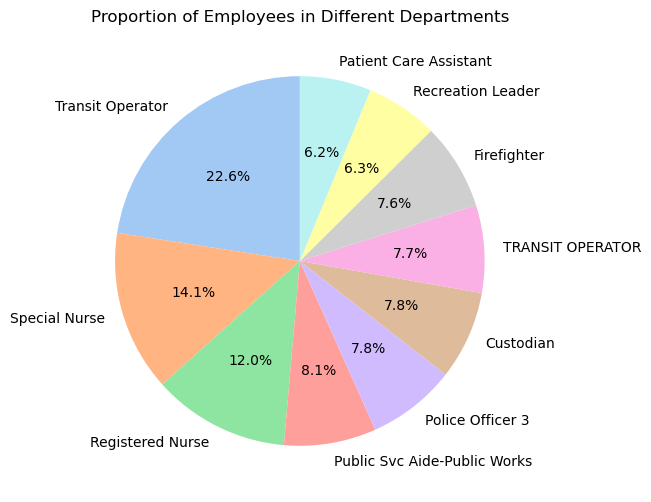

In [68]:
plt.figure(figsize=(10, 6))

plt.pie(top_dep, labels=top_dep.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Departments')
plt.show()

# Task 5: Grouped Analysis

In [75]:
df.groupby(by='JobTitle')[['BasePay','TotalPayBenefits']].mean().sort_values(by=['BasePay','TotalPayBenefits'],ascending = False)

,BasePay,TotalPayBenefits
JobTitle,,
Chief of Police,309767.683333,411732.266667
"Chief, Fire Department",304232.340000,408865.326667
"Gen Mgr, Public Trnsp Dept",297769.413333,380696.440000
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.000000,302377.730000
"Dep Dir for Investments, Ret",276153.765000,355731.260000
...,...,...
WAREHOUSE WORKER,0.000000,3369.710000
Conversion,0.000000,3361.440000
ASSISTANT RECREATION SUPERVISOR,0.000000,2474.410000


In [52]:
df.groupby(by='Year')[['BasePay','TotalPayBenefits']].mean()

,BasePay,TotalPayBenefits
Year,,
2011,63595.956517,71744.103871
2012,65436.406857,100553.229232
2013,69576.866579,101440.519714
2014,66564.421924,100261.438668


# Task 6: Simple Correlation Analysis

In [53]:
df_corr= df.drop(columns=['Id','EmployeeName','JobTitle','Agency','Year'])
corr = df_corr.corr()
corr

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
BasePay,1.000000,0.266633,0.283760,0.652321,0.950542,0.943027
OvertimePay,0.266633,1.000000,0.316592,0.226165,0.504859,0.467981
OtherPay,0.283760,0.316592,1.000000,0.160334,0.470496,0.422341
Benefits,0.652321,0.226165,0.160334,1.000000,0.632187,0.781955
TotalPay,0.950542,0.504859,0.470496,0.632187,1.000000,0.977312
TotalPayBenefits,0.943027,0.467981,0.422341,0.781955,0.977312,1.000000


<Axes: >

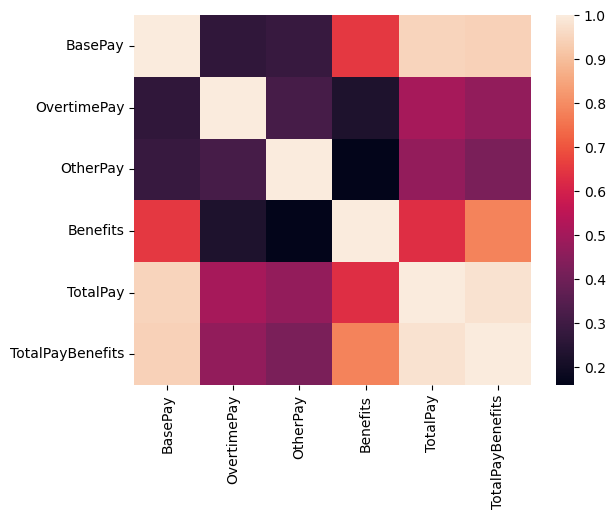

In [54]:
sns.heatmap(corr)

# Task 8: Summary of Insights


## Dataset Overview:
* The dataset has 148,654 entries and 13 columns.
* Certain columns have missing values, such as 'BasePay,' 'OvertimePay,' 'OtherPay,' and 'Benefits.'
## Descriptive Statistics:
### BasePay and TotalPay:
* The average BasePay is approximately `$66,325`, with a minimum of `-$166.01` and a maximum of `$319,275.01`.
* The average TotalPay is approximately `$74,768`, with a minimum of `-$618.13` and a maximum of `$567,595.43`.
* The minmum and maximum values declare that their might be some outliers which need more investigation to deal with.
## Grouped Analysis:
* Job titles like 'Chief of Police' have higher average TotalPay and TotalPayBenefits compared to others.
* There's variation in salaries across different job titles, as seen in the grouped analysis.
## Correlation Analysis:
* There is a strong positive correlation between 'BasePay' and 'TotalPay' (0.95), which is expected as the TotalPay depends on BasePay.
* 'Benefits' has a relatively strong positive correlation with 'BasePay' (0.65) and 'TotalPay' (0.63).
* 'OvertimePay' and 'OtherPay' show moderate positive correlations with 'TotalPay.'

## Salary Distribution:

* The salary distribution is right-skewed, with some job titles having higher average salaries.

## Job Title Variability:

* Job titles play a significant role in salary disparities, with certain titles having higher average compensation.
## Missing Values Handling:

* Missing values in columns like 'BasePay' were filled, but further analysis and domain knowledge may be needed for columns like 'Benefits.'
## Recommendations for Further Analysis:

Explore specific job titles with unusually high or low average salaries for anomalies.
Investigate the impact of missing values in 'Benefits' and assess if imputation is suitable or if further action is required.
Further analysis and domain expertise may be required for a more in-depth understanding.

# Good Luck!